# Issues (task) covered in this feature notebook :

*  explore data a bit w/modules, functions and plots
*  baseline model test
    - KNN classifier 
    - Logistic regression or Dummy Classifier ?
    - or Clustering algorithm ?
    - or treebased ?
* base metrics 
    - precision, recall
    - f1_score
    - accuracy, balanced accuracy
    - classification report
    - confusion matrix
    - area under the curve

* train_test_split


[Project Issue Link](https://github.com/users/Cazta/projects/1/views/2?pane=issue&itemId=32899160)



# Importing Packages

In [26]:
# import necessary libraries

import pandas as pd
import numpy as np
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt 

#sklearn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# import custom functions

from custom_functions import get_data_summary, our_metrics, eval_metrics, evaluate_model


import warnings
warnings.filterwarnings('ignore')

# Global Variables

In [2]:
# global variables

# for reproducibility sake
RSEED = 42

# data path to load version 1 of the processed fraud data
data_path = 'data/fraud_data_processed_V1.csv'




# Loading Data

In [27]:
# load version 1 of the processed fraud data

df = get_data_summary(data_path = data_path, desc_sm = True, no_unq = True)

Dataset shape: (4476691, 19)
__________________________________________________
 
    Number of observations : 4476691
    Number of features : 19
        
__________________________________________________
Dataset sample: 
__________________________________________________


,district,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,counter_type,index_change,quantity_counters
2484007,62,11,309,2001-02-20,0,2012-07-20,40,0.0,5,6,1,147,0,0,0,4,GAZ,147,53
3195119,62,11,305,1986-01-15,0,2011-06-01,40,0.0,5,6,1,49,0,0,0,4,GAZ,49,59
4347997,63,11,311,2007-07-21,0,2017-02-06,40,0.0,5,6,1,145,0,0,0,4,GAZ,145,64
3537829,69,11,107,1983-01-31,0,2010-05-27,11,0.0,207,9,1,1003,0,0,0,6,ELEC,1003,40
1232211,62,11,302,1979-03-31,0,2011-08-11,11,0.0,203,6,1,1200,149,0,0,4,ELEC,1349,80
209817,60,11,101,2010-11-02,0,2019-01-02,40,0.0,5,8,1,216,0,0,0,8,GAZ,216,46
3709458,62,11,303,1999-09-30,0,2012-01-26,40,0.0,5,6,1,64,0,0,0,4,GAZ,64,61
744880,62,11,309,1992-11-27,0,2008-05-08,11,0.0,203,6,1,156,0,0,0,4,ELEC,156,30
3152478,63,11,311,2010-01-13,0,2013-02-21,40,0.0,5,6,1,117,0,0,0,4,GAZ,117,50
4359855,62,11,305,2000-04-24,0,2014-03-01,40,0.0,5,6,1,135,0,0,0,4,GAZ,135,84


__________________________________________________
Dataset descriptive summary: 
__________________________________________________


ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [4]:
# grouping by client id's using the aggregate : count

df_gb_clients = df.groupby('client_id').count().reset_index()

# curious grouped dataframe summary : by client's id count

#how many invoices per client
df_gb_clients_sm = get_data_summary(data = df_gb_clients)

NameError: name 'df' is not defined

In [28]:
df=pd.read_csv('data/fraud_data_processed_V1.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476691 entries, 0 to 4476690
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   district              int64  
 1   client_catg           int64  
 2   region                int64  
 3   creation_date         object 
 4   target                int64  
 5   invoice_date          object 
 6   tarif_type            int64  
 7   counter_statue        float64
 8   counter_code          int64  
 9   reading_remarque      int64  
 10  counter_coefficient   int64  
 11  consommation_level_1  int64  
 12  consommation_level_2  int64  
 13  consommation_level_3  int64  
 14  consommation_level_4  int64  
 15  months_number         int64  
 16  counter_type          object 
 17  index_change          int64  
 18  quantity_counters     int64  
dtypes: float64(1), int64(15), object(3)
memory usage: 648.9+ MB


---

# Brief Exploration

* Stakeholder : STEG (Tunisian Company of Electricity and Gas)
* Business objective : To use client's billing history to predict which clients are probably fraudulently manipulating their energy (electricity and gas) meters
* open questions : 
    - What does the consumption  (consummation?) levels tell us about fraudulent activities? 
    - What does the recorded reading remark  tell us about fraudulent activities? 
    - etc

* hypothesis statements :
    - very low consumption levels are an indicator of fraud.
    - client_category is a predictor for fraud.
    - geographical location (district, region) is an indicator for fraud.
    - not having any consummation at level 2 and higher is an indicator for fraud.
    - certain reading_remarques are an indicator of fraud.

* possible future stakeholders / use cases: 
    - other Gas or Electricity Companies
    - Law enforcement agencies
    - state authorities for utilities


* aggregating some data to gain insight
* basic plots to investigate the data visually
    - countplots
    - 

    

In [29]:
# grouping by client id's using the aggregate : count

# df_gb_clients = df.groupby('client_id').count().reset_index()

# # curious grouped dataframe summary : by client's id count

# #how many invoices per client
# df_gb_clients_sm = get_data_summary(data = df_gb_clients)




In [30]:

# countplots of specific features by target

cat_features = ['disrict', 'client_catg', 'region',  'tarif_type', 
                    'counter_statue', 'reading_remarque', 'counter_coefficient']

for i in cat_features:
    fig = plt.figure(figsize=(12,5))
    sns.countplot(data=df, x=df[i], hue=df["target"])
    plt.show();

KeyError: 'disrict'

<Figure size 1200x500 with 0 Axes>

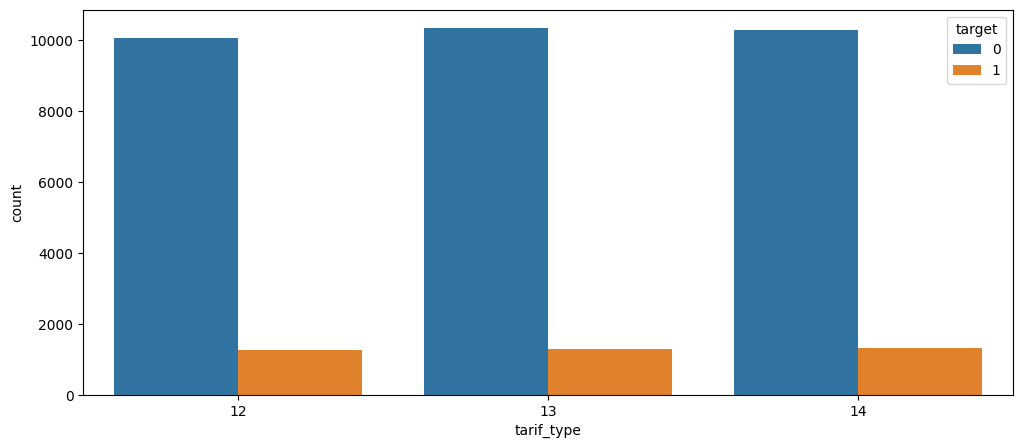

In [32]:
fig = plt.figure(figsize=(12,5))
sns.countplot(df.query('tarif_type >= 12 and tarif_type <=14'), x=df.query('tarif_type >= 12 and tarif_type <=14')['tarif_type'], hue=df["target"])
plt.show();

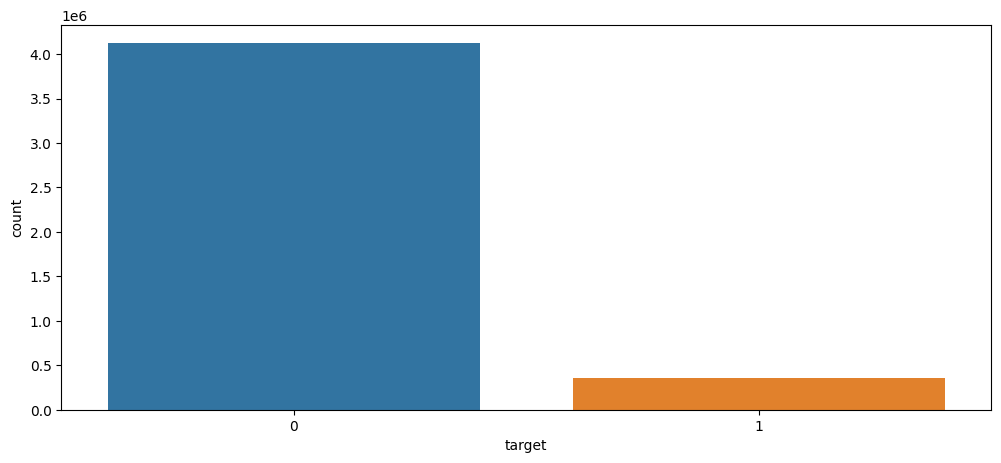

In [33]:
fig = plt.figure(figsize=(12,5))
sns.countplot(df, x=df['target'])
plt.show();

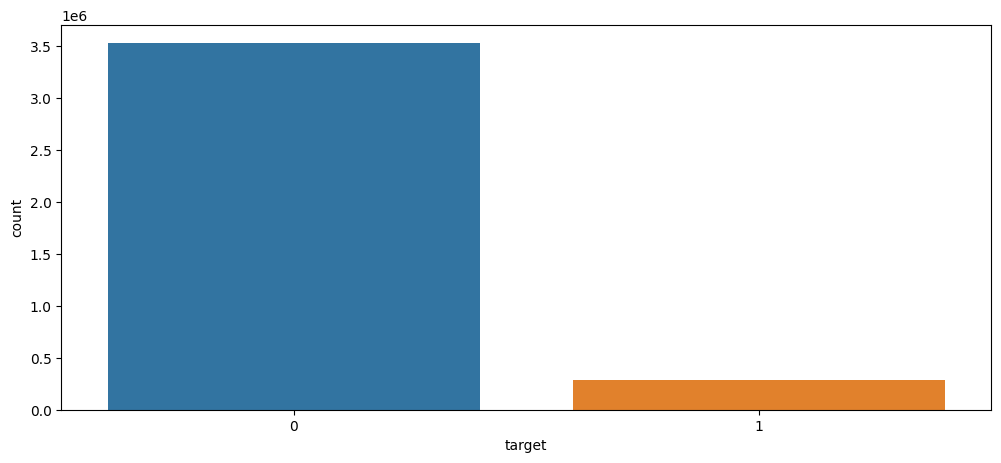

In [34]:
fig = plt.figure(figsize=(12,5))
sns.countplot(df.query('consommation_level_2 == 0 and consommation_level_3 == 0 and consommation_level_4 == 0'), x=df.query('consommation_level_2 == 0 and consommation_level_3 == 0 and consommation_level_4 == 0')['target'])
plt.show();

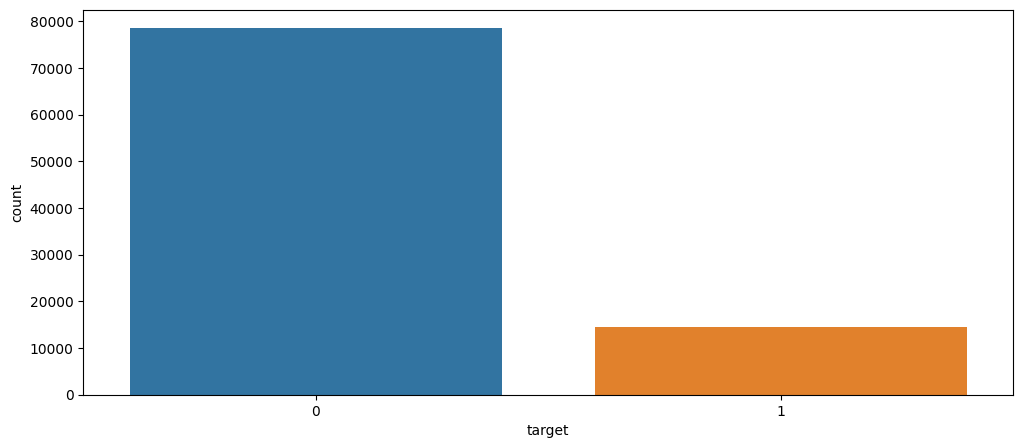

In [35]:
fig = plt.figure(figsize=(12,5))
sns.countplot(df, x=df.query('consommation_level_4 != 0')['target'])
plt.show();

## Remarks on hypotheses
* District is __NOT__ an indicator for fraud.
* Most frauds are committed by clients of category 11. However, there are not many clients of the other two categories.
* the top 5 regions with a high number of frauds being committed are: 101, 103, 104, 107, 311. Still, most customers are not committing fraud in those regions. Regions cannot be used as a single indicator for fraud.
* geographical locations are not a sole indicator of fraud
* tarif_type is not a good indicator for fraud
* consommation_level: The fraud percentage in level 4 is higher than for level 1 only. the hypothesis is declined.

In [36]:
# # grouby reading remark for dataset with specific features

# feat_1 =  ['target', 'counter_number', 'counter_statue', 'counter_code', 
#         'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
#         'consommation_level_3', 'consommation_level_4', 'old_index',
#         'new_index']


# read_mark = df.groupby("reading_remarque")[feat_1].count().reset_index()
# read_mark

In [37]:
# feat_2 =  ['reading_remarque', 'counter_number', 'counter_statue', 'counter_code', 
#         'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
#         'consommation_level_3', 'consommation_level_4', 'old_index',
#         'new_index']


# target_count = df.groupby("target")[feat_2].count().reset_index()
# target_count

In [38]:
# # consumation levels, counter details and target

# cons_count =  ['target', 'counter_number',
#         'counter_statue', 'counter_code', 'reading_remarque',
#         'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
#         'consommation_level_3', 'consommation_level_4', 'old_index',
#         'new_index']

# # date related feature variables

# date_features = ['target', 'creation_date',  'invoice_date',  'months_number']


# Baseline Modelling

* state baseline features
* define x (input data) and y (target)
* train_test_split 
* run baseline model : KNN as baseline
  - logistic reg?  sgd? 


# Evaluate the baseline model

* get evaluation scores using features from the initial data
    - Area under the curve score (roc_auc_score)
    - precision score
    - recall score
    - accuracy score
    - balanced accuracy score
    - confusion matrix
    - classification report


## Baseline Model: Predicting all to be non-fraud

* Out baseline model will be a simply to predict that no one commits fraud

## Model Metrics
* we chose our model metric to be the f_beta-score or the f1-score, because the target is unbalanced we can not use accuracy
* we need to detect true positives, but limit the number of false positives to a minimum
* our chosen evaluation metric therefore is the f_beta-score with a value of beta that we will determine during the modeling process

In [39]:
# Defining baseline model that predicts no one commits fraud
def baseline_model(df):
    y_pred = [0 for x in df.index]
    return y_pred

In [52]:
# feature variables of our data

features = df.columns.to_list()
features.remove('target')
features


['district',
 'client_catg',
 'region',
 'creation_date',
 'invoice_date',
 'tarif_type',
 'counter_statue',
 'counter_code',
 'reading_remarque',
 'counter_coefficient',
 'consommation_level_1',
 'consommation_level_2',
 'consommation_level_3',
 'consommation_level_4',
 'months_number',
 'counter_type',
 'index_change',
 'quantity_counters']

In [41]:
# defining the base X (input data) features and y (target) feature

X = df[features]
y = df["target"]


print(f"shape of baseline input data: {X.shape}")
print(f"shape of target data: {y.shape}")



shape of baseline input data: (4476691, 18)
shape of target data: (4476691,)


In [42]:
# train test split for base
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RSEED)

In [43]:
# Compute predictions with baseline model for test set
y_baseline_test = baseline_model(X_test)

Accuracy: 0.9209
_____________________
F1-score: 0.0
_____________________
Fbeta_score with beta=1.5: 0.0
_____________________
Fbeta_score with beta=2: 0.0
_____________________
Fbeta_score with beta=3: 0.0
_____________________
Recall 0.0
_____________________
Specificity 1.0


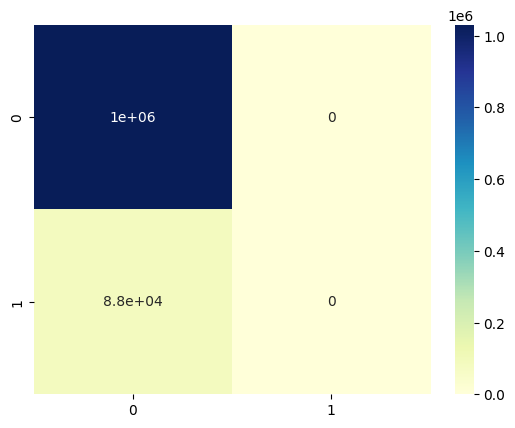

In [44]:
our_metrics(y_test, y_baseline_test)

## Standardization ..scale

In [50]:

from sklearn.preprocessing import StandardScaler
col_scale = ['district',
 'client_catg',
 'region',
 'tarif_type',
 'counter_statue',
 'counter_code',
 'reading_remarque',
 'counter_coefficient',
 'consommation_level_1',
 'consommation_level_2',
 'consommation_level_3',
 'consommation_level_4',
 'months_number',
 'index_change',
 'quantity_counters']
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test[col_scale])
#X_test_scaled = scaler.transform(X_test[col_scale])

## Normalization ..scale 

In [51]:
# Scaling with minmax scaler
from sklearn.preprocessing import MinMaxScaler
col_scale = ['district',
 'client_catg',
 'region',
 'tarif_type',
 'counter_statue',
 'counter_code',
 'reading_remarque',
 'counter_coefficient',
 'consommation_level_1',
 'consommation_level_2',
 'consommation_level_3',
 'consommation_level_4',
 'months_number',
 'index_change',
 'quantity_counters']

scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_train[col_scale])
#X_test_scaled = scaler.transform(X_test[col_scale])

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X=_train, y_train)

y_pred_lr = log_reg.predict(x_test)

SyntaxError: positional argument follows keyword argument (3894587262.py, line 2)

In [ ]:
# logistic regression model 

train_probs_lr = log_reg.predict_proba(x_train)[:, 1]
test_probs_lr = log_reg.predict_proba(x_test)[:, 1]

train_preds_lr = log_reg.predict(x_train)
test_preds_lr = log_reg.predict(x_test)

print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs_lr)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, test_probs_lr)}')
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

In [ ]:


# --!
evaluate_model(test_preds_lr, test_probs_lr, train_preds_lr, train_probs_lr)



NameError: name 'evaluate_model' is not defined

In [ ]:
# K-neighbours classifier as baseline?


# initialize and fit/train model on data

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, np.ravel(y_train))

# predict on test

y_pred_knn = knn.predict(x_test)





In [ ]:
# Make probability predictions
train_probs_knn = knn.predict_proba(x_train)[:, 1]
test_probs_knn = knn.predict_proba(x_test)[:, 1]

train_preds_knn = knn.predict(x_train)
test_preds_knn = knn.predict(x_test)

print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs_knn)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, test_probs_knn)}')
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')


In [ ]:
eval_metrics(y_test, y_pred_knn)



In [ ]:

evaluate_model(test_preds_knn, test_probs_knn, train_preds_knn, train_probs_knn)


In [ ]:
# sgdclassifier 

# Fit and evaluate model without hyperparameter tuning using cross validation and unscaled data 
sgd_classifier = SGDClassifier(random_state=RSEED)
scores = cross_val_score(sgd_classifier, x_train, y_train, cv=5, n_jobs=-1)

# Evaluation 
print('Score (unscaled):', round(scores.mean(), 4))


In [ ]:
# save current version of processed data for use later

# df_processed.to_csv('data/fraud_data_processed_V1.csv', index=False)

